In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("dataset/f1_dnf.csv")
df_dnf=pd.read_csv("dataset/df_dnf.csv")
df_finish=pd.read_csv("dataset/df_finish.csv")

In [4]:
df.replace(r"\N", np.nan, inplace=True)

In [5]:
df.describe()

,resultId,raceId,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,23.972500,34.013439,5.067721,281.465900,0.289500
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,19.233599,25.167968,57.938131,414.586363,0.453553
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-37.849700,-118.189000,-7.000000,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,9.000000,34.843100,-2.940560,18.000000,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,18.000000,43.734700,5.971390,153.000000,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,34.000000,49.254200,14.764700,401.000000,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,80.000000,57.265300,144.968000,2227.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9029 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     2607 non-null   object 
 9   fastestLap       3105 non-null   object 
 10  rank             3202 non-null   object 
 11  fastestLapTime   3105 non-null   object 
 12  fastestLapSpeed  2809 non-null   object 
 13  driverRef        10000 non-null  object 
 14  surname          10000 non-null  object 
 15  forename         10000 non-null  object 
 16  dob              10000 non-null  object 
 17  nationality_x

# Cleaning and Preprocessing

### Handling Missing Values

In [7]:
df_dropped=df.drop(columns=['rank', 'fastestLap'])

In [8]:
milli_col_actual_missing= df_dropped[(df_dropped['target_finish'] == 1) & (df_dropped['milliseconds'].isna())]
print(len(milli_col_actual_missing))
print(f"Percentof actual missing {(len(milli_col_actual_missing)/10000)*100}")

290
Percentof actual missing 2.9000000000000004


In [9]:
count = ((df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna())).sum()
print("Number of laps = 0 with fastestLapSpeed NaN:", count)


Number of laps = 0 with fastestLapSpeed NaN: 814


In [10]:
count = ((df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna())).sum()
print("Number of laps = 0 with fastestLapSpeed NaN:", count)

Number of laps = 0 with fastestLapSpeed NaN: 814


In [11]:
df_dropped.loc[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].isna()), 'milliseconds'] = 0

In [12]:
df_dropped.loc[(df_dropped['laps'] == 0) & (df_dropped['fastestLapTime'].isna()), 'fastestLapTime'] = 0
df_dropped.loc[(df_dropped['laps'] == 0) & (df_dropped['fastestLapSpeed'].isna()), 'fastestLapSpeed'] = 0

In [13]:
df_dropped['points'] = df_dropped.apply(
    lambda row: 0 if row['positionOrder'] > 10 else row['points'],
    axis=1
)

In [14]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         10000 non-null  int64  
 1   raceId           10000 non-null  int64  
 2   year             10000 non-null  int64  
 3   round            10000 non-null  int64  
 4   grid             10000 non-null  int64  
 5   positionOrder    10000 non-null  int64  
 6   points           9586 non-null   float64
 7   laps             9022 non-null   float64
 8   milliseconds     9710 non-null   object 
 9   fastestLapTime   3919 non-null   object 
 10  fastestLapSpeed  3623 non-null   object 
 11  driverRef        10000 non-null  object 
 12  surname          10000 non-null  object 
 13  forename         10000 non-null  object 
 14  dob              10000 non-null  object 
 15  nationality_x    10000 non-null  object 
 16  constructorRef   10000 non-null  object 
 17  name         

### Handling ambigous values

In [15]:
grid_above_20 = (df['grid'] > 20).sum()
position_above_26 = (df['positionOrder'] > 26).sum()

print("Grid positions > 20:", grid_above_20)
print("Position orders > 26:", position_above_26)

Grid positions > 20: 1152
Position orders > 26: 432


In [16]:
laps_count=df['laps'].value_counts().sort_values(axis=0,ascending=False)
laps_count.sort_values().head()

laps
185.0    1
103.0    1
189.0    1
110.0    1
122.0    1
Name: count, dtype: int64

In [17]:
def lap_to_milliseconds(lap_str):
    try:
        if lap_str == 0:
            return 0
        minutes, seconds = lap_str.split(":")
        return int(minutes)*60000 + float(seconds)*1000
    except:
        return None

df_dropped['fastestLapTime_ms'] = df_dropped['fastestLapTime'].apply(lap_to_milliseconds)
df_dropped['fastestLapSpeed']=pd.to_numeric(df_dropped['fastestLapSpeed'], errors='coerce')

In [18]:
df_not_finished= df[df['target_finish'] == 0]
df_finished= df[df['target_finish'] == 1]
df_not_finished = df_not_finished.reset_index(drop=True)
df_finished = df_finished.reset_index(drop=True)
print(df_not_finished.info())
print(df_finished.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         7105 non-null   int64  
 1   raceId           7105 non-null   int64  
 2   year             7105 non-null   int64  
 3   round            7105 non-null   int64  
 4   grid             7105 non-null   int64  
 5   positionOrder    7105 non-null   int64  
 6   points           6417 non-null   float64
 7   laps             6421 non-null   float64
 8   milliseconds     2 non-null      object 
 9   fastestLap       1506 non-null   object 
 10  rank             1590 non-null   object 
 11  fastestLapTime   1506 non-null   object 
 12  fastestLapSpeed  1357 non-null   object 
 13  driverRef        7105 non-null   object 
 14  surname          7105 non-null   object 
 15  forename         7105 non-null   object 
 16  dob              7105 non-null   object 
 17  nationality_x 

In [19]:
df_dropped['milliseconds']=pd.to_numeric(df_dropped['milliseconds'], errors='coerce')
df_dnf_with_time = df_dropped[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].notna()) & (df_dropped['milliseconds'] > 0)]
print(df_dnf_with_time[['date','driverRef', 'milliseconds', 'laps', 'raceId','target_finish']])


            date driverRef  milliseconds  laps  raceId  target_finish
1222  2005-04-24    button     5272321.0  62.0      74              0
3212  2005-04-24      sato     5296621.0  62.0      74              0


In [20]:
df_dropped.loc[
    (df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'] > 0),
    'milliseconds'
] = 0


In [21]:
df_dnf_with_time = df_dropped[(df_dropped['target_finish'] == 0) & (df_dropped['milliseconds'].notna()) & (df_dropped['milliseconds'] > 0)]
print(df_dnf_with_time[['date','driverRef', 'milliseconds', 'laps', 'raceId','target_finish']])


Empty DataFrame
Columns: [date, driverRef, milliseconds, laps, raceId, target_finish]
Index: []


In [40]:
# amb_lap=df[(df_dropped['laps']>80)]
# amb_lap.info()

# Feature Analysis

Grid vs dnf

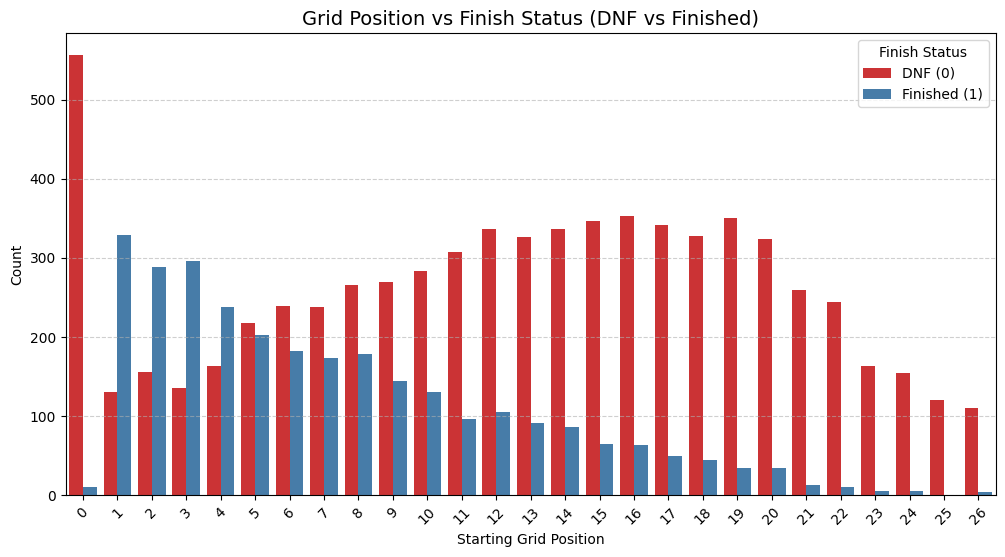

In [23]:
filtered_df = df_dropped[df_dropped['grid'] <= 26]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='grid', hue='target_finish', palette='Set1')

plt.title('Grid Position vs Finish Status (DNF vs Finished)', fontsize=14)
plt.xlabel('Starting Grid Position')
plt.ylabel('Count')
plt.legend(title='Finish Status', labels=['DNF (0)', 'Finished (1)'])
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

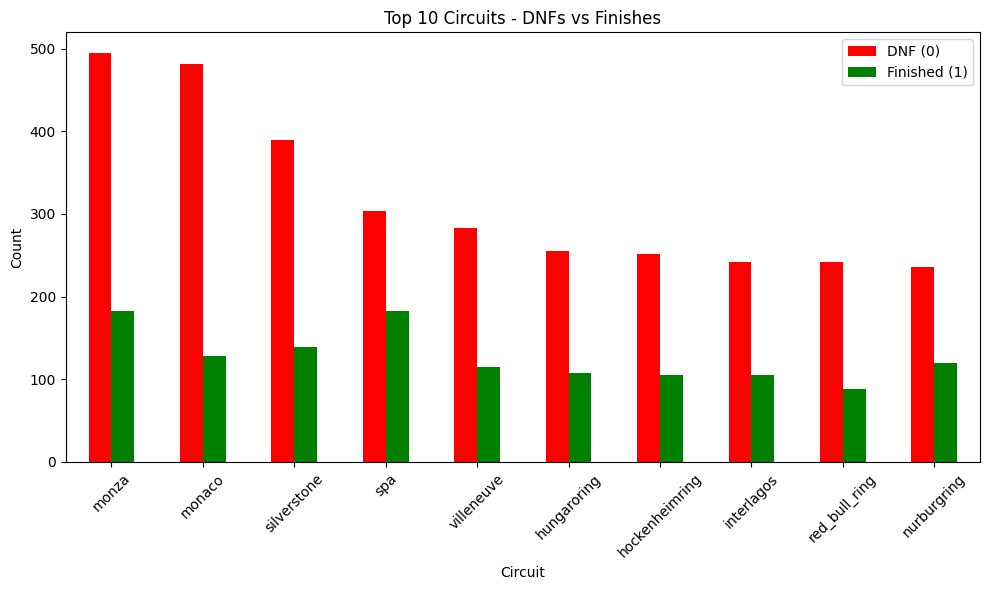

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

circuit_finish_counts = df.groupby(['circuitRef', 'target_finish']).size().unstack(fill_value=0)

top_dnf_circuits = circuit_finish_counts.sort_values(by=0, ascending=False).head(10)

top_dnf_circuits.plot(kind='bar', figsize=(10,6), color=['red', 'green'])
plt.title("Top 10 Circuits - DNFs vs Finishes")
plt.xlabel("Circuit")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


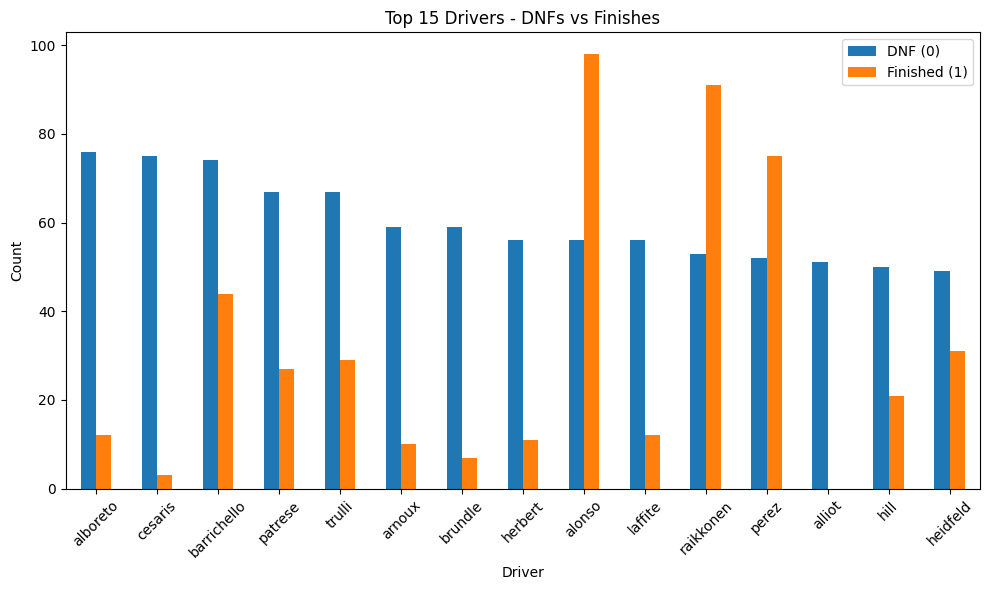

In [25]:
driver_finish_counts = df_dropped.groupby(['driverRef', 'target_finish']).size().unstack(fill_value=0)

top_dnf_drivers = driver_finish_counts.sort_values(by=0, ascending=False).head(15)

top_dnf_drivers.plot(kind='bar', figsize=(10,6))
plt.title("Top 15 Drivers - DNFs vs Finishes")
plt.xlabel("Driver")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

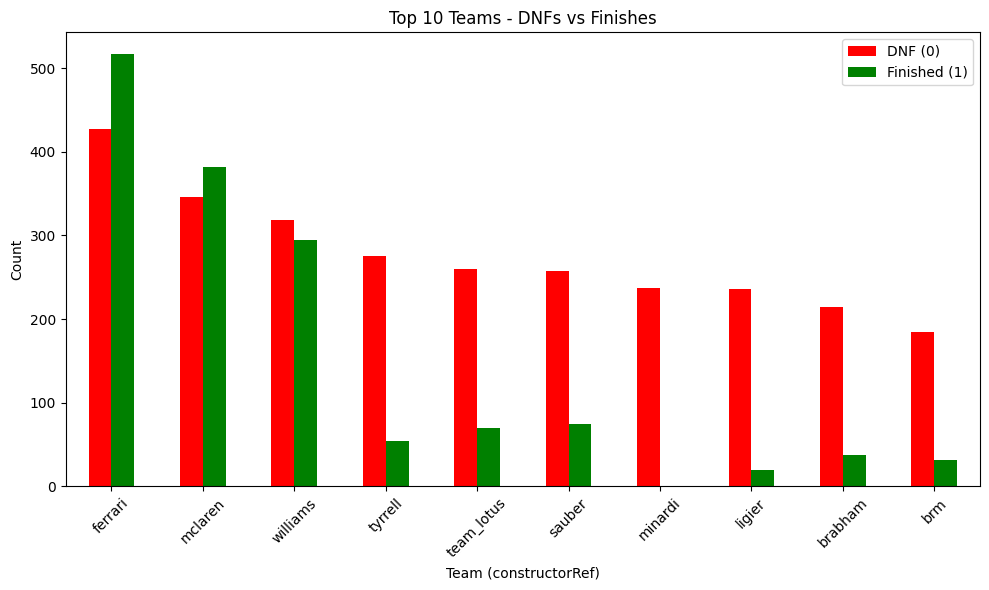

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
team_finish_counts = df.groupby(['constructorRef', 'target_finish']).size().unstack(fill_value=0)

top_dnf_teams = team_finish_counts.sort_values(by=0, ascending=False).head(10)

top_dnf_teams.plot(kind='bar', figsize=(10,6), color=['red', 'green'])
plt.title("Top 10 Teams - DNFs vs Finishes")
plt.xlabel("Team (constructorRef)")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


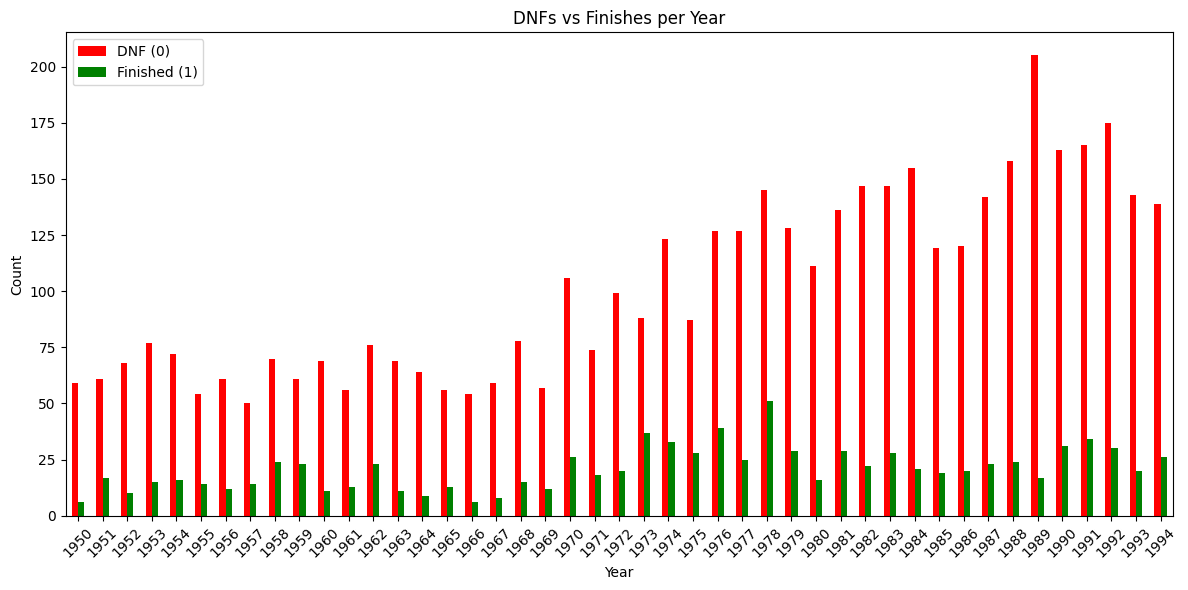

In [27]:
import matplotlib.pyplot as plt

year_finish_counts = df.groupby(['year', 'target_finish']).size().unstack(fill_value=0)

year_finish_counts_sorted = year_finish_counts.sort_index().head(45)

year_finish_counts_sorted.plot(kind='bar', figsize=(12,6), color=['red', 'green'])
plt.title("DNFs vs Finishes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Axes: >

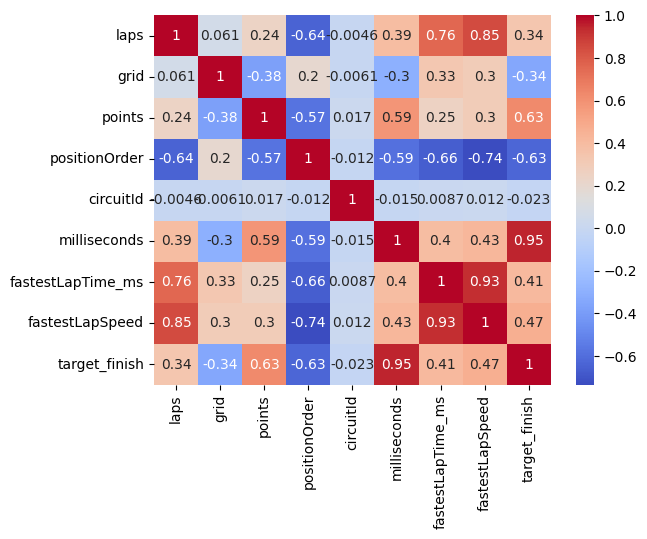

In [41]:
corr = df_dropped[['laps','grid','points','positionOrder','circuitId','milliseconds','fastestLapTime_ms','fastestLapSpeed','target_finish']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


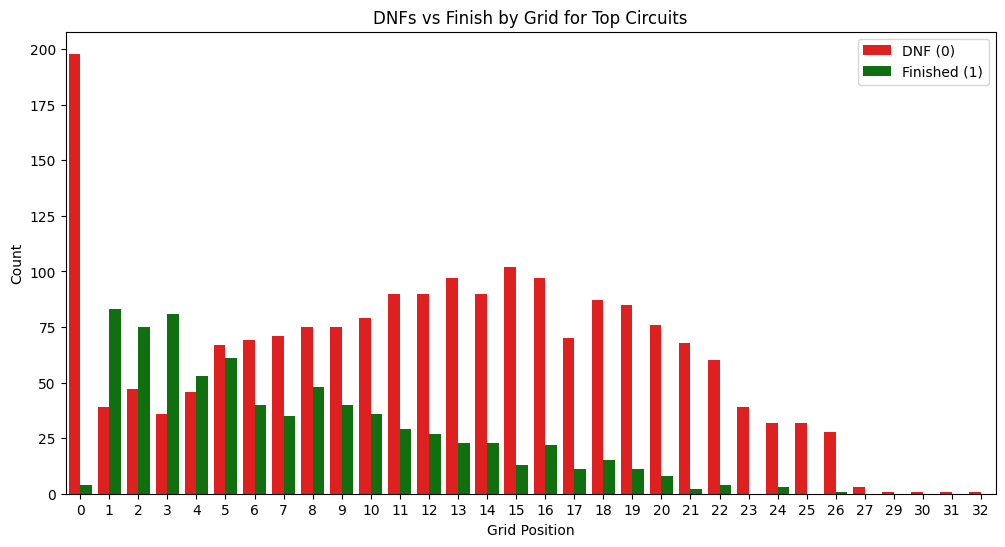

In [29]:
top_circuits = df_dropped[df_dropped['target_finish']==0]['circuitRef'].value_counts().head(5).index

subset = df_dropped[df_dropped['circuitRef'].isin(top_circuits)]

plt.figure(figsize=(12,6))
sns.countplot(
    x='grid',
    hue='target_finish',
    data=subset,
    palette={0:'red', 1:'green'}
)
plt.title("DNFs vs Finish by Grid for Top Circuits")
plt.xlabel("Grid Position")
plt.ylabel("Count")
plt.legend(["DNF (0)", "Finished (1)"])
plt.show()


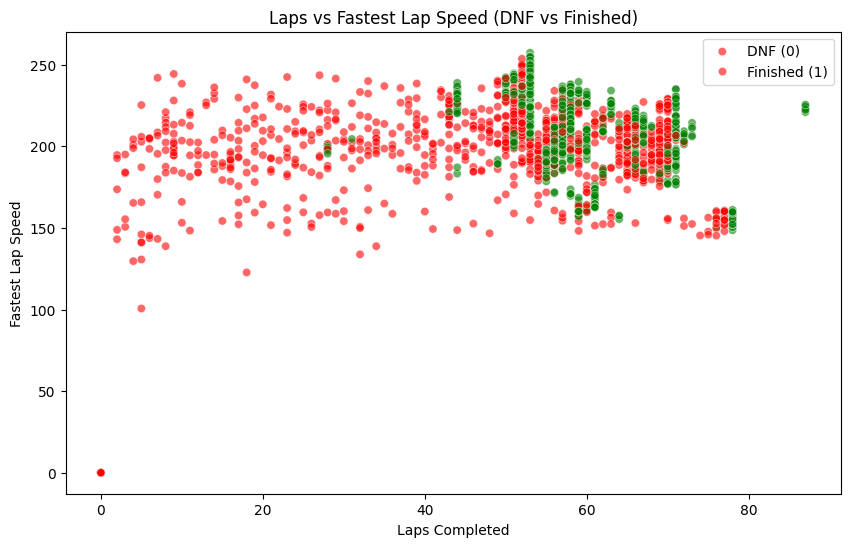

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='laps',
    y='fastestLapSpeed',
    hue='target_finish',
    data=df_dropped,
    palette={0:'red', 1:'green'},
    alpha=0.6
)
plt.title("Laps vs Fastest Lap Speed (DNF vs Finished)")
plt.xlabel("Laps Completed")
plt.ylabel("Fastest Lap Speed")
plt.legend(["DNF (0)", "Finished (1)"])
plt.show()


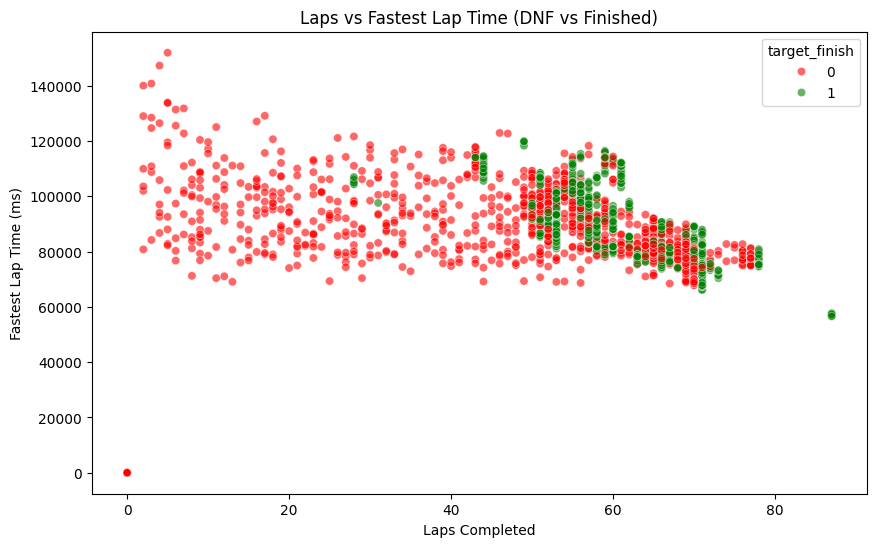

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='laps',
    y='fastestLapTime_ms',
    hue='target_finish',
    data=df_dropped,
    palette={0:'red', 1:'green'},
    alpha=0.6
)
plt.title("Laps vs Fastest Lap Time (DNF vs Finished)")
plt.xlabel("Laps Completed")
plt.ylabel("Fastest Lap Time (ms)")
plt.show()


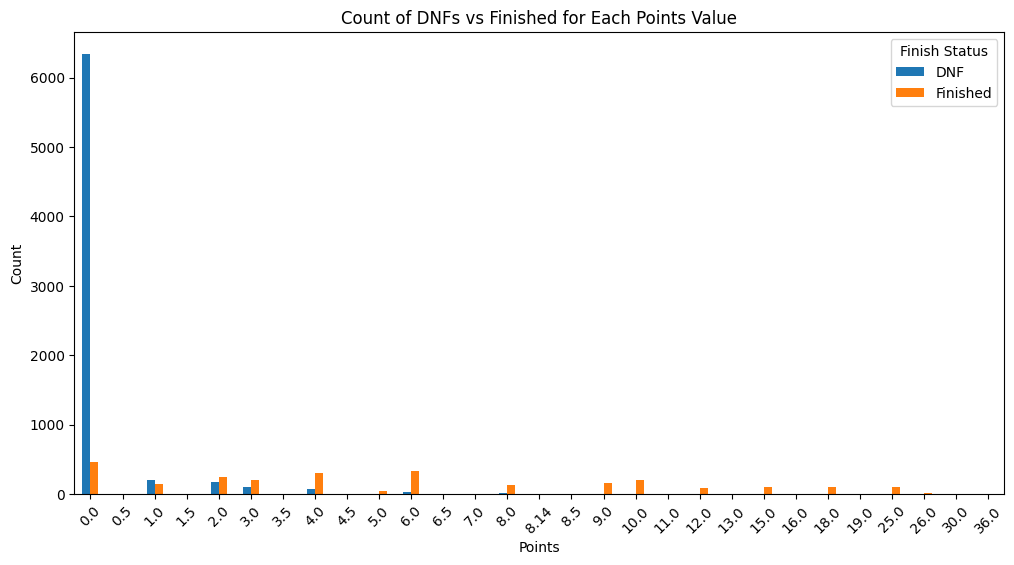

In [32]:
points_counts = df_dropped.groupby(['points', 'target_finish']).size().unstack(fill_value=0)

points_counts.plot(kind='bar', figsize=(12,6))
plt.xlabel("Points")
plt.ylabel("Count")
plt.title("Count of DNFs vs Finished for Each Points Value")
plt.xticks(rotation=45)
plt.legend(['DNF', 'Finished'], title='Finish Status')
plt.show()

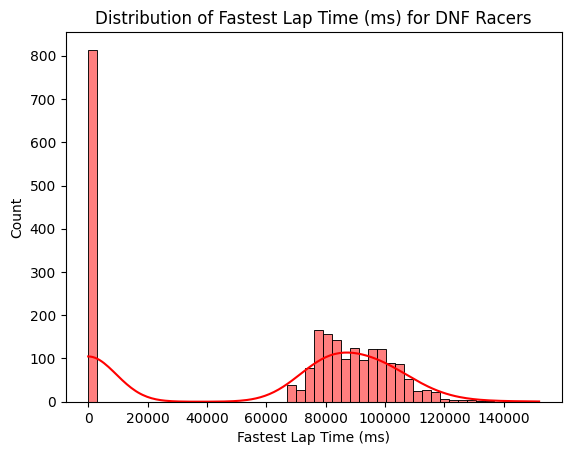

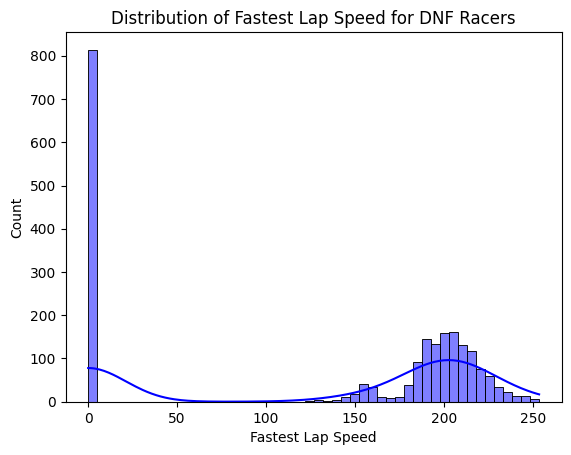

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df_dnf = df_dropped[df_dropped['target_finish'] == 0]

sns.histplot(df_dnf['fastestLapTime_ms'], bins=50, kde=True, color='red')
plt.title("Distribution of Fastest Lap Time (ms) for DNF Racers")
plt.xlabel("Fastest Lap Time (ms)")
plt.show()


sns.histplot(df_dnf['fastestLapSpeed'], bins=50, kde=True, color='blue')
plt.title("Distribution of Fastest Lap Speed for DNF Racers")
plt.xlabel("Fastest Lap Speed")
plt.show()


In [34]:
df_dropped[['lat', 'lng']].drop_duplicates().shape[0]


77

<Axes: xlabel='lng', ylabel='lat'>

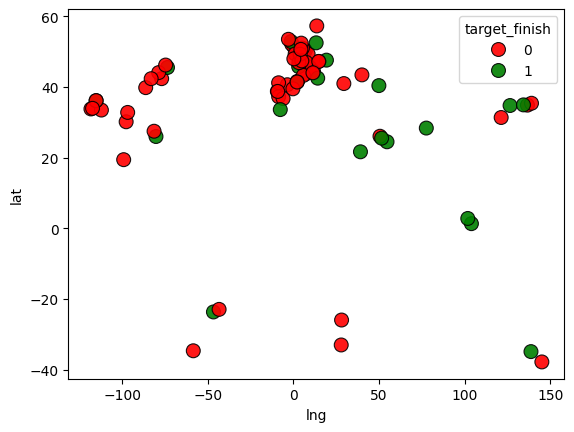

In [35]:
unique_circuits = df_dropped.drop_duplicates(subset=['lat', 'lng'])

sns.scatterplot(
    x='lng', y='lat',
    hue='target_finish',
    data=unique_circuits,
    palette={0: 'red', 1: 'green'},
    alpha=0.9,
    s=100, 
    edgecolor='black'
)


Relevant Features:


In [36]:
df_dropped.to_csv("Proc_f1_data.csv",index=False)

In [ ]:
dnf_racers = df_dropped[df_dropped['target_finish'] == 0]

dnf_points_counts = dnf_racers['points'].value_counts().sort_index()

print(dnf_points_counts)


points
0.0     6340
0.5        1
1.0      200
1.5        2
2.0      166
3.0      106
3.5        1
4.0       79
5.0        2
6.0       32
8.0        8
10.0       3
12.0       1
Name: count, dtype: int64
